In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def random_matrix(N):
    # Establish minimum value in order to column check in while loop
    minval = 0.0
    
    while(minval == 0.0):
    
        M = [[np.random.randint(0,2) for i in range(N)] for j in range(N)]
    
    #all_zeros = np.all(0)
    # establishes diagonal of zeros 
        for i in range(N):
            M[i][i] = 0.0
    # if 1 in (i,j) position then for loop established a LINK from site j to site i    
        for i in range(N):
            for j in range(N):
                M[i][j] = M[j][i]
    # return matrix determined by input (N) if column sum does not equal zero, if zero repeat
        Col_sum = np.sum(M,axis = 1)
    
        minval = np.amin(Col_sum)
        

        return M      
            



In [3]:
# Calls matrix function to create our first 5x5 matrix
MatrixA = np.array(random_matrix(5))

print(MatrixA)

[[0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 0.]
 [1. 1. 1. 0. 1.]
 [1. 1. 0. 1. 0.]]


In [4]:
# Create identity matrix for NxN Matrix (needed for Method 1)
def Identity(N):
    return np.eye(N)

print(Identity(5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [5]:
#Part 2A.
column_sum = np.sum(MatrixA, axis=0)
# combines column sum with Matrix 1 total in order to achieve adjacency Matrix
adjMatrix = MatrixA / column_sum
#print(np.array(adjMatrix))
modadjMatrix = np.array(adjMatrix)
print(modadjMatrix)

[[0.         0.         0.33333333 0.25       0.33333333]
 [0.         0.         0.33333333 0.25       0.33333333]
 [0.33333333 0.33333333 0.         0.25       0.        ]
 [0.33333333 0.33333333 0.33333333 0.         0.33333333]
 [0.33333333 0.33333333 0.         0.25       0.        ]]


In [6]:
#2b Method 1 (obtain R column vector of pageranks)


def Method1(d,N,M,coeff):
    
    R_unnorm = np.linalg.solve((Identity(N) - d*M), (1 - d/N) * coeff)
 
    # Normalize R DirectMethod
    Rnorm = (1. / np.linalg.norm(R_unnorm)) * R_unnorm
    
    return np.array(Rnorm)
    

In [7]:
def Method2(d,N,M,E):
    #establish our "guess" vectors and important initialized values or normalization and err

    x_i = np.ones((N))
    Mhat = d*M + ((1-d)/N)*E
    x_n = np.linalg.norm(x_i)
    x1 = x_i / x_n
    err = 1.0
    #while loop created because termination criterion is established
    while(err > 1E-6):
        
        xn = np.dot(Mhat, x1)
        
        #Normalize xn
        
        xn = (1 / np.linalg.norm(xn)) * xn
        
        err = np.linalg.norm((xn - x1))
        
        
        
        #Renormalize xk vector
        
        x1 = xn
         
    
    return np.array(xn)

In [8]:
# R Vector 1 for DIRECT METHOD N=5 (NORMALIZED):
RVector = Method1(.85,5,modadjMatrix,np.ones(5))
print(RVector)


[0.41997858 0.41997858 0.41997858 0.54265273 0.41997858]


In [9]:
# Power Method result N=5: 

Eigenvec = Method2(.85,5,modadjMatrix,np.ones((5,5)))
print(Eigenvec)


[0.41997855 0.41997855 0.41997855 0.54265282 0.41997855]


In [10]:
#Plots Time for each method N=5, REPEATED THROUGHOUT FOR OTHER N VALUES

start_time = time.time()
Method1(.85,5,modadjMatrix,np.ones(5))
Method1n5_cost = ((time.time() - start_time))
print("%.2E" %Method1n5_cost)

Method2(.85,5,modadjMatrix,np.ones((5,5)))
Method2n5_cost = ((time.time() - start_time))
print("%.2E" % Method2n5_cost)


2.21E-04
9.97E-04


In [11]:
MatrixA1 = np.matrix(random_matrix(10))
print(MatrixA1)
#Part 2A.
column_sum = np.sum(MatrixA1, axis=1)
# combines column sum with Matrix 1 total in order to achieve adjacency Matrix
adjMatrix = MatrixA1 / column_sum
#print(np.array(adjMatrix))
modadjMatrixn10 = np.matrix(adjMatrix)
print(modadjMatrixn10)

[[0. 0. 1. 1. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 1. 1. 1. 1. 1. 0. 0. 1. 0.]]
[[0.         0.         0.14285714 0.14285714 0.         0.14285714
  0.14285714 0.14285714 0.14285714 0.14285714]
 [0.         0.         0.         0.         0.         0.
  0.5        0.         0.         0.5       ]
 [0.16666667 0.         0.         0.16666667 0.16666667 0.
  0.16666667 0.16666667 0.         0.16666667]
 [0.16666667 0.         0.16666667 0.         0.16666667 0.
  0.16666667 0.16666667 0.         0.16666667]
 [0.         0.         0.25       0.25       0.         0.
  0.25       0.         0.         0.25      ]
 [0.33333333 0.         0.         0.         0.         0.
  0.         0.33333333 0.         0.33333333]
 [0.2        0.2   

In [12]:
#TIME FOR N=10
start_time = time.time()
Method1(.85,10,modadjMatrixn10,np.ones(10))
Method1n10_cost = ((time.time() - start_time))
print("%.2E" %Method1n10_cost)

Method2(.85,10,modadjMatrixn10,np.ones((10,10)))
Method2n10_cost = ((time.time() - start_time))
print("%.2E" % Method2n10_cost)

3.07E-03
3.62E-03


In [13]:
MatrixA2 = np.matrix(random_matrix(50))
print(MatrixA2)
#Part 2A.
column_sum = np.sum(MatrixA2, axis=1)
# combines column sum with Matrix 1 total in order to achieve adjacency Matrix
adjMatrix = MatrixA2 / column_sum
#print(np.array(adjMatrix))
modadjMatrixn50 = np.matrix(adjMatrix)
print(modadjMatrixn50)

[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]]
[[0.         0.         0.03703704 ... 0.         0.         0.03703704]
 [0.         0.         0.04761905 ... 0.         0.         0.04761905]
 [0.04347826 0.04347826 0.         ... 0.         0.04347826 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.04761905 0.04761905]
 [0.         0.         0.05263158 ... 0.05263158 0.         0.        ]
 [0.04       0.04       0.         ... 0.04       0.         0.        ]]


In [14]:
#TIME FOR N=50
start_time = time.time()
Method1(.85,50,modadjMatrixn50,np.ones(50))
Method1n50_cost = ((time.time() - start_time))
print("%.2E" %Method1n50_cost)

Method2(.85,50,modadjMatrixn50,np.ones((50,50)))
Method2n50_cost = ((time.time() - start_time))
print("%.2E" % Method2n50_cost)

3.24E-03
4.09E-03


In [15]:
MatrixA3 = np.matrix(random_matrix(100))
print(MatrixA3)
#Part 2A.
column_sum = np.sum(MatrixA3, axis=1)
# combines column sum with Matrix 1 total in order to achieve adjacency Matrix
adjMatrix = MatrixA3 / column_sum
#print(np.array(adjMatrix))
modadjMatrixn100 = np.matrix(adjMatrix)
print(modadjMatrixn100)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [0. 1. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 1. 0.]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.02083333 ... 0.02083333 0.         0.        ]
 [0.         0.01785714 0.         ... 0.01785714 0.         0.01785714]
 ...
 [0.         0.01754386 0.01754386 ... 0.         0.         0.01754386]
 [0.         0.         0.         ... 0.         0.         0.02222222]
 [0.         0.         0.01960784 ... 0.01960784 0.01960784 0.        ]]


In [16]:
#TIME FOR N=100
start_time = time.time()
Method1(.85,100,modadjMatrixn100,np.ones(100))
Method1n100_cost = ((time.time() - start_time))
print("%.2E" %Method1n100_cost)

Method2(.85,100,modadjMatrixn100,np.ones((100,100)))
Method2n100_cost = ((time.time() - start_time))
print("%.2E" % Method2n100_cost)

1.00E-02
1.14E-02


In [17]:
MatrixA4 = np.matrix(random_matrix(500))
print(MatrixA4)
#Part 2A.
column_sum = np.sum(MatrixA4, axis=1)
# combines column sum with Matrix 1 total in order to achieve adjacency Matrix
adjMatrix = MatrixA4 / column_sum
#print(np.array(adjMatrix))
modadjMatrixn500 = np.matrix(adjMatrix)
print(modadjMatrixn500)

[[0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]
[[0.         0.00395257 0.         ... 0.00395257 0.         0.        ]
 [0.00416667 0.         0.         ... 0.         0.         0.00416667]
 [0.         0.         0.         ... 0.00371747 0.         0.        ]
 ...
 [0.004      0.         0.004      ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.00442478]
 [0.         0.00425532 0.         ... 0.         0.00425532 0.        ]]


In [18]:
#TIME FOR N=500
start_time = time.time()
Method1(.85,500,modadjMatrixn500,np.ones(500))
Method1n500_cost = ((time.time() - start_time))
print("%.2E" %Method1n500_cost)

Method2(.85,500,modadjMatrixn500,np.ones((500,500)))
Method2n500_cost = ((time.time() - start_time))
print("%.2E" % Method2n500_cost)

8.93E-03
1.25E-02


In [19]:
MatrixA5 = np.matrix(random_matrix(1000))
print(MatrixA5)
#Part 2A.
column_sum = np.sum(MatrixA5, axis=1)
# combines column sum with Matrix 1 total in order to achieve adjacency Matrix
adjMatrix = MatrixA5 / column_sum
#print(np.array(adjMatrix))
modadjMatrixn1000 = np.matrix(adjMatrix)
print(modadjMatrixn1000)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.00200803 ... 0.00200803 0.00200803 0.        ]
 [0.         0.0019685  0.         ... 0.         0.0019685  0.        ]
 ...
 [0.         0.00209205 0.         ... 0.         0.         0.        ]
 [0.         0.00209205 0.00209205 ... 0.         0.         0.00209205]
 [0.         0.         0.         ... 0.         0.00200401 0.        ]]


In [20]:
#TIME FOR N=1000
start_time = time.time()
Method1(.85,1000,modadjMatrixn1000,np.ones(1000))
Method1n1000_cost = ((time.time() - start_time))
print("%.2E" %Method1n1000_cost)

Method2(.85,1000,modadjMatrixn1000,np.ones((1000,1000)))
Method2n1000_cost = ((time.time() - start_time))
print("%.2E" % Method2n1000_cost)

3.48E-02
5.28E-02


In [21]:
MatrixA6 = np.matrix(random_matrix(2000))
print(MatrixA6)
#Part 2A.
column_sum = np.sum(MatrixA6, axis=1)
# combines column sum with Matrix 1 total in order to achieve adjacency Matrix
adjMatrix = MatrixA6 / column_sum
#print(np.array(adjMatrix))
modadjMatrixn2000 = np.matrix(adjMatrix)
print(modadjMatrixn2000)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 1.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0.         0.         0.00096993 ... 0.         0.         0.        ]
 [0.         0.         0.00101215 ... 0.00101215 0.00101215 0.00101215]
 [0.00098425 0.00098425 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00102354 0.         ... 0.         0.         0.        ]
 [0.         0.00099108 0.         ... 0.         0.         0.        ]
 [0.         0.001002   0.         ... 0.         0.         0.        ]]


In [22]:
#TIME FOR N=2000
start_time = time.time()
Method1(.85,2000,modadjMatrixn2000,np.ones(2000))
Method1n2000_cost = ((time.time() - start_time))
print("%.2E" %Method1n2000_cost)

Method2(.85,2000,modadjMatrixn2000,np.ones((2000,2000)))
Method2n2000_cost = ((time.time() - start_time))
print("%.2E" % Method2n2000_cost)

1.77E-01
2.52E-01


In [23]:
MatrixA7 = np.matrix(random_matrix(5000))
print(MatrixA7)
#Part 2A.
column_sum = np.sum(MatrixA7, axis=1)
# combines column sum with Matrix 1 total in order to achieve adjacency Matrix
adjMatrix = MatrixA7 / column_sum
#print(np.array(adjMatrix))
modadjMatrixn5000 = np.matrix(adjMatrix)
print(modadjMatrixn5000)

[[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 1. 0.]]
[[0.         0.00040209 0.         ... 0.         0.         0.00040209]
 [0.00038971 0.         0.         ... 0.         0.         0.00038971]
 [0.         0.         0.         ... 0.00039936 0.00039936 0.        ]
 ...
 [0.         0.         0.00039968 ... 0.         0.         0.        ]
 [0.         0.         0.00040096 ... 0.         0.         0.00040096]
 [0.000409   0.000409   0.         ... 0.         0.000409   0.        ]]


In [24]:
#TIME FOR N=5000
start_time = time.time()
Method1(.85,5000,modadjMatrixn5000,np.ones(5000))
Method1n5000_cost = ((time.time() - start_time))
print("%.2E" %Method1n5000_cost)

Method2(.85,5000,modadjMatrixn5000,np.ones((5000,5000)))
Method2n5000_cost = ((time.time() - start_time))
print("%.2E" % Method2n5000_cost)

1.25E+00
1.91E+00


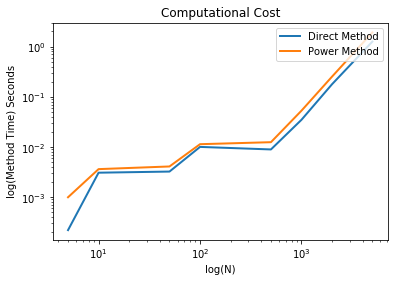

In [25]:
#Data from above time gathering methods 
#Ns are hardcoded in 
#Both axes set to loglog

DirectMethod_time = (Method1n5_cost, Method1n10_cost, Method1n50_cost, Method1n100_cost, Method1n500_cost, Method1n1000_cost, Method1n2000_cost, Method1n5000_cost)
N1 = (5, 10, 50, 100, 500, 1000, 2000, 5000)

PowerMethod_time = (Method2n5_cost, Method2n10_cost, Method2n50_cost, Method2n100_cost, Method2n500_cost, Method2n1000_cost, Method2n2000_cost, Method2n5000_cost)
N2 = (5, 10, 50, 100, 500, 1000, 2000, 5000)


fig, ax = plt.subplots()
# imports data and plots on same graph BOTH methods
plt.plot(N1, DirectMethod_time, label = 'Direct Method', lw=2)
plt.plot(N2, PowerMethod_time, label = 'Power Method', lw=2)
plt.xlabel('log(N)')
plt.ylabel('log(Method Time) Seconds')
#Sets graph to  loglog format
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')

plt.legend(loc = "upper right")


plt.title('Computational Cost')

plt.show()

In [86]:
#Testing to see how aggresive our termination criterion can be 
# After testing n = 51,75,85,225,750 determine that for top 10 rank match up sites an error norm becomes 1/n
# This makes sense because the larger the n value the lower our error_norm should be

def Method2(d,N,M,E):
    #establish our guess vector xn1

    x_i = np.ones((N))
    Mhat = d*M + ((1-d)/N)*E
    x_n = np.linalg.norm(x_i)
    x1 = x_i / x_n
    err = 1.0
    while(err > 1E-6):
        
        xn = np.dot(Mhat, x1)
        
        #Normalize xn
        
        xn = (1 / np.linalg.norm(xn)) * xn
        
        err = np.linalg.norm((xn - x1))
        
        
        
        #Renormalize xk vector
        
        x1 = xn
         
    
    return np.array(xn)

In [87]:
#Part of Trial for part 5 (** ONe TRIAL).
MatrixA75 = np.matrix(random_matrix(225))
print(MatrixA75)
#Part 2A.
column_sum = np.sum(MatrixA75, axis=1)
# combines column sum with Matrix 1 total in order to achieve adjacency Matrix
adjMatrix = MatrixA75 / column_sum
#print(np.array(adjMatrix))
modadjMatrixn75 = np.matrix(adjMatrix)
print(modadjMatrixn75)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 1. 0. 0.]]
[[0.         0.00934579 0.00934579 ... 0.         0.         0.        ]
 [0.00925926 0.         0.         ... 0.         0.00925926 0.        ]
 [0.0106383  0.         0.         ... 0.         0.         0.0106383 ]
 ...
 [0.         0.         0.         ... 0.         0.00862069 0.00862069]
 [0.         0.00869565 0.         ... 0.00869565 0.         0.        ]
 [0.         0.         0.00806452 ... 0.00806452 0.         0.        ]]
